# Statistical Data Analysis - Project <a id='intro'></a>

---
## Introduction <a id='intro'></a>
---
Our task in this project is to analyze clients' behavior and determine which plan brings in the most revenue for the commercial department to make any necessary adjustments to the marketing budgets.

We'll be reviewing a sample size of 500 cutomers' data for a telecom operator, <em>Megaline</em>. We will analyze the revenue for the clients under their two prepaid plans, surf and ultimate.

The data we'll be analyzing is in the the following files (found in `datasets` directory within this repo):

- /datasets/megaline_calls.csv

- /datasets/megaline_internet.csv

- /datasets/megaline_messages.csv

- /datasets/megaline_plans.csv

- /datasets/megaline_users.csv


We will be testing the following hypotheses:
<ol>
    1. There is no difference in revenue between the two plans, <em>Surf</em> and <em>Ultimate</em>.
</ol>
<ol>
    2. The average revenue from users in NY-NJ area is same from that of the users from other regions.
</ol>

This project will condsist of the following stages:

    1. Data Overview
    2. Data Preporocessing
    3. Data Analysys
    4. Hypotheses Testing
    5. Consclusion


---
## Data Overview <a id='data overview'></a>
---

In [1]:
# Importing dependencies
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from scipy import stats as st
import numpy as np
import math as mt
from functools import reduce

In [2]:
# Setting plot themes
sns.set_theme('notebook','darkgrid')
plt.style.use("ggplot") 

In [3]:
# Loading datasets
users_df = pd.read_csv('~/Triple_Ten_Projects/Sprint_3/datasets/megaline_users.csv')
calls_df = pd.read_csv('~/Triple_Ten_Projects/Sprint_3/datasets/megaline_calls.csv')
messages_df = pd.read_csv('~/Triple_Ten_Projects/Sprint_3/datasets/megaline_messages.csv')
internet_df = pd.read_csv('~/Triple_Ten_Projects/Sprint_3/datasets/megaline_internet.csv')
plans_df = pd.read_csv('~/Triple_Ten_Projects/Sprint_3/datasets/megaline_plans.csv')


In [4]:
# Printing first 3 rows of each dataset 
print('Users df:\n',users_df.head(3))
print('Calls df:\n',calls_df.head(3),'\n')
print('Messages df:\n',messages_df.head(3),'\n')
print('Internet df:\n',internet_df.head(3),'\n')
print('Plans df:\n',plans_df.head(3),'\n')

Users df:
    user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
Calls df:
          id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48 

Messages df:
          id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31 

Internet df:
          id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.

### __Descriptions of each dataset__:

The `users` table (data on users):

- __`'user_id'`__: unique user identifier

- __`'first_name'`__: user's name

- __`'last_name'`__: user's last name

- __`'age'`__: user's age (years)

- __`'reg_date'`__: subscription date (dd, mm, yy)

- __`'churn_date'`__: the date the user stopped using the service (if the value is missing, the calling plan was being used when this database was extracted)

- __`'city'`__: user's city of residence

- __`'plan'`__: calling plan name

<br>
The `calls` table (data on calls):

- __`'id'`__: unique call identifier

- __`'call_date'`__: call date

- __`'duration'`__: call duration (in minutes)

- __`'user_id'`__: the identifier of the user making the call

<br>
The `messages` table (data on texts):

- __`'id'`__: unique text message identifier

- __`'message_date'`__: text message date

- __`'user_id'`__: the identifier of the user sending the text# Print the general/summary information about the messages' DataFrame

<br>
The `internet` table (data on web sessions):

- __`'id'`__: unique session identifier

- __`'mb_used'`__: the volume of data spent during the session (in megabytes)

- __`'session_date'`__: web session date

- __`'user_id'`__: user identifier# Print the general/summary information about the internet DataFrame

<br>
The `plans` table column details:

- __`'plan_name'`__: calling plan name

- __`'usd_monthly_fee'`__: monthly charge in US dollars

- __`'minutes_included'`__: monthly minute allowance

- __`'messages_included'`__: monthly text allowance

- __`'mb_per_month_included'`__: data volume allowance (in megabytes)

- __`'usd_per_minute'`__: price per minute after exceeding the package limits (e.g., if the package includes 100 minutes, the 101st minute will be charged)

- __`'usd_per_message'`__: price per text after exceeding the package limits

- __`'usd_per_gb'`__: price per extra gigabyte of data after exceeding the package limits (1 GB = 1024 megabytes)

## Plans

In [5]:
# Printing info on each dataset to check for any errors in the dataset
print('Users df:\n')
print(users_df.info())
print('\n\nCalls df:\n')
print(calls_df.info())
print('\n\nMessages df:\n')
print(messages_df.info())
print('\n\nInternet df:\n')
print(internet_df.info())
print('\n\nPlans df:\n')
print(plans_df.info())

Users df:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


Calls df:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ M

Taking a look at the overview of the datasets, we can address the following:

- `users_df`: 

<ol>

1. Change `'reg_date'` as good practice and leave`'churn_date'` as on=bect type due to the missing values

2. Convert `'plan'` & `'city'` to category type

3. The missing values in `'churn_date'` implies the customer has not churned so we'll just replace with string 'ongoing'

4. Filter out the data to split the datasets with users from ny/nj redgion and another for all users outside ny/nj for comparison and hypothesis testing

</ol>

- `calls_df`:
<ol>

1. change `'plan'` to category type 

2. Switch `'reg_date'` to date timetype to allow for feature engineering

3. `'call_duration'` is a float64 so we'll round up those values up

</ol>

- `messages_df`:
<ol>

1. Change `'message_date'` to datetime type

2. figure out if need to generate new colunm with overages on number of messages sent on a given month

</ol>

- `internet_df`:
<ol>

1. Correct `'session_date'` type to datetime

2. Round up `'mb_used'` and convert to integer

3. Convert `'mb_used'` measurements to GB to fascilitate accurate usage readings

4. Change `'mb_used'` column name to `'gb_used'`

</ol>

- `plans_df`:
<ol>

1. change plan type to category

2. Adjust the column name from `'mb_per_month_included'` to `'gb_per_month_included'`

---
## Data Preprocessing
---

### Users <a id='users'></a>

In [6]:
# Printing out first five rows
users_df.head(5) 

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [7]:
# Checking for duplicates
users_df.duplicated().sum()

0

In [8]:
# Checkin g for missing values
users_df.isna().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

466 out of 500 customers retained is not bad. 10% customer retention is not perfect but its on the right track. Some feedback from the churned customer or analytical insight into each of the churned customers could lead us to the reason for the churn and possible intervention for future customers at risk of churning.

In [9]:
# Filling in missing values
users_df['churn_date'] = users_df['churn_date'].fillna('ongoing')

# Confirming missing values filled
users_df.isna().sum()

user_id       0
first_name    0
last_name     0
age           0
city          0
reg_date      0
plan          0
churn_date    0
dtype: int64

In [10]:
# Converting `'plan'` to category type
users_df['plan'] = users_df['plan'].astype('category')

# Confirming type change
users_df['plan'].dtype

CategoricalDtype(categories=['surf', 'ultimate'], ordered=False, categories_dtype=object)

In [11]:
# Converting `'city'` type to category
users_df['city'] = users_df['city'].astype('category')

# Confirming change
users_df['city'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 500 entries, 0 to 499
Series name: city
Non-Null Count  Dtype   
--------------  -----   
500 non-null    category
dtypes: category(1)
memory usage: 3.2 KB


In [12]:
# Switching `'reg_date'` to datetime type
users_df['reg_date'] = pd.to_datetime(users_df['reg_date'] , format= '%Y-%m-%d')
users_df["reg_month"] = users_df["reg_date"].dt.to_period('M')

# Confirming change
users_df.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,reg_month
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,ongoing,2018-12
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,ongoing,2018-08
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,ongoing,2018-10
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,ongoing,2018-01
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,ongoing,2018-05


Let's see the ratio of `ultimate` users to `surf` users 

In [13]:
# Filtering for ultimate and surf plan users
ultimate_users = users_df[users_df['plan']=='ultimate']
surf_users = users_df[users_df['plan']=='surf']

# Printing counts for number of customers enrolled in each plan
print('Ultimate user count: ',ultimate_users.count().iloc[0])
print('Surf user count: ', surf_users.count().iloc[0])

print(ultimate_users['user_id'].count()/surf_users['user_id'].count(),'% of users have the ultimate plan')

Ultimate user count:  161
Surf user count:  339
0.4749262536873156 % of users have the ultimate plan


Let's check how many users in each plan have churned. Could be an indicator for a potential underlying issue

In [14]:
print('Churned Ultimate:\n')
print(ultimate_users[ultimate_users['churn_date']!='ongoing'].count().iloc[0])
print('\n\nChurned Surf:\n')
print(surf_users[surf_users['churn_date']!='ongoing'].count().iloc[0])

Churned Ultimate:

11


Churned Surf:

23


Distribution of churned customers is consistent with the distribution of total customers in each plan

Let's visualize the growth with a barplot

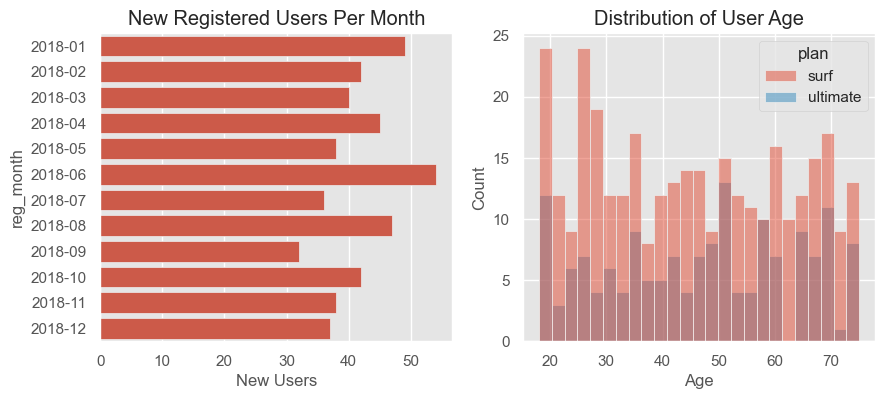

Total number of unique users in sample:  500


In [15]:
figg, axs = plt.subplots(1,2,figsize=(10,4))

ax = axs[0]
sns.barplot(users_df.groupby("reg_month")["user_id"].count(),orient='h',ax=ax)
ax.set_title("New Registered Users Per Month")
ax.set_xlabel("New Users")
ax.set_ylabel=("Month")

# Visualizing age demographic
ax= axs[1]
sns.histplot(users_df,x="age",hue="plan",bins=25,ax=ax)
ax.set_title("Distribution of User Age")
ax.set_xlabel("Age")
plt.show()

print("Total number of unique users in sample: ", users_df["user_id"].nunique())


The figure on the left shows us the number of new users per month. Out of 500 total unique users within this sample, the month of June produced the most newly registered users and September with the least. 

The figure on the right visualizes the distribution of user age with the plan count for each age. Users in their 20s make up the largest demographic, with 120 users. Users in the 50s are the group with the highest amount of 'ultimate' plans, likely business owners.

We'll query to isolate the ny/nj regions followed by the rest of all regions to test our hypothesis comparing those regions

In [16]:
# Assigning `'city'` values for our query
ny_region = ['Rochester, NY MSA','Albany-Schenectady-Troy, NY MSA','Buffalo-Cheektowaga, NY MSA','New York-Newark-Jersey City, NY-NJ-PA MSA']
ny_nj_df = users_df.query('city in @ny_region')

# Printing first five rows
ny_nj_df.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,reg_month
14,1014,Edmundo,Simon,61,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-25,surf,ongoing,2018-11
22,1022,Bo,Snow,73,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-20,surf,2018-09-07,2018-04
24,1024,Yuki,Tyson,74,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-08-21,surf,ongoing,2018-08
27,1027,Georgeanna,Cardenas,38,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-26,surf,ongoing,2018-06
31,1031,Lane,Martin,52,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-07-15,ultimate,ongoing,2018-07


In [17]:
# Querying for customers from all regions not in ny/nj 
other_regions_df = users_df.query('city not in @ny_region')

# Printing first five rows
other_regions_df.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,reg_month
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,ongoing,2018-12
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,ongoing,2018-08
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,ongoing,2018-10
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,ongoing,2018-01
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,ongoing,2018-05


### Calls <a id='calls'></a>

In [18]:
# Printing a sample of data for calls
calls_df.sample(5)

,id,user_id,call_date,duration
91481,1329_463,1329,2018-11-15,8.85
105746,1373_226,1373,2018-10-27,7.68
69469,1249_324,1249,2018-09-29,12.25
3827,1016_41,1016,2018-12-16,0.00
20634,1077_601,1077,2018-09-29,0.00


In [19]:
calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [20]:
calls_df.duplicated().sum()

0

In [21]:
calls_df.isna().sum()

id           0
user_id      0
call_date    0
duration     0
dtype: int64

No duplicates & no missing values found. Only other issue found is the `'duration'` values. As per the plan description, all calls durations are rounded up by the minute.

In [22]:
# Rounding `'duration'` values up
calls_df['duration'] = np.ceil(calls_df['duration'])

# Confirming changes
calls_df['duration'].head(5)

0     9.0
1    14.0
2    15.0
3     6.0
4     5.0
Name: duration, dtype: float64

In [23]:
# Changing `'call_date'` values to datetime type
calls_df['call_date'] = pd.to_datetime(calls_df['call_date'], format = '%Y-%m-%d')

# Engineering a new column indication the month and year of each placed call
calls_df['month'] = calls_df['call_date'].dt.to_period('M')

# Printing for confirmations od changes
print(calls_df["call_date"].dtype)
calls_df.head()

datetime64[ns]


,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,9.0,2018-12
1,1000_145,1000,2018-12-27,14.0,2018-12
2,1000_247,1000,2018-12-27,15.0,2018-12
3,1000_309,1000,2018-12-28,6.0,2018-12
4,1000_380,1000,2018-12-30,5.0,2018-12


In [24]:
# Merging `users_df` with `calls_df` 
user_calls = users_df.merge(calls_df,on="user_id")

In [25]:
# Grouping the data by user_id and call date to get total durations of each user call durations each day
calls_totals = np.ceil(user_calls.groupby(["user_id","month"]).agg({
    "duration" : "sum",
    "id" : "count"
    })).reset_index().rename(
        columns = {
            "id" : "total_calls",
            "duration" : "total_minutes"
        }
    )

# Adding column with user average duration per call for each month
calls_totals["average_duration"] = calls_totals["total_minutes"] / calls_totals["total_calls"]

# Printing results
calls_totals.sort_values("total_minutes",ascending=False).head(3)

,user_id,month,total_minutes,total_calls,average_duration
1242,1267,2018-12,1510.0,205.0,7.365854
1487,1329,2018-12,1369.0,191.0,7.167539
1669,1365,2018-12,1357.0,180.0,7.538889


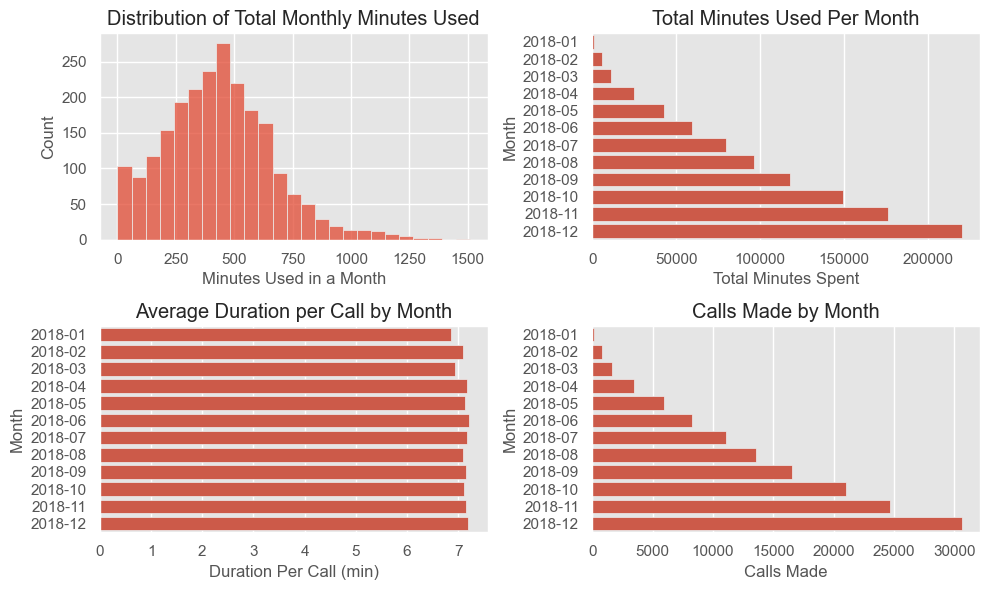

In [26]:
fig, axs = plt.subplots(2,2,figsize=(10,6))#,gridspec_kw=dict(width_ratios=(1,1), height_ratios=(1,1)))

# Plotting distributions of total daily call durations on first axes
ax = axs[0][0]
sns.histplot(calls_totals["total_minutes"], bins=25, ax=ax)
ax.set_title("Distribution of Total Monthly Minutes Used")
ax.set_xlabel("Minutes Used in a Month")

# Plotting total minutes spent by month on second axes
ax= axs[0][1]
sns.barplot(user_calls.groupby("month")["duration"].sum(), orient='h', ax=ax)
ax.set_title("Total Minutes Used Per Month")
ax.set_xlabel("Total Minutes Spent")
ax.set_ylabel("Month")

# Plotting Average talk time per call
ax = axs[1][0]
sns.barplot(user_calls.groupby('month')['duration'].mean(),orient='h',ax=ax)
ax.set_title('Average Duration per Call by Month')
ax.set_xlabel('Duration Per Call (min)')
ax.set_ylabel("Month")


# Plotting total call counts per month
ax = axs[1][1]
sns.barplot(user_calls.groupby("month")["id"].count(),orient='h',ax=ax)
ax.set_title('Calls Made by Month')
ax.set_ylabel("Month")
ax.set_xlabel("Calls Made")

plt.tight_layout()
plt.show()

The top left figure shows the distribution of monthly total minutes used by a user in one month. We can see a slight skew. Most of the customers use less than 600 minutes in a given month.

The top right figure shows the companies exponential growth in activity throught 12 months. It's an amazing sight to see less than 5000 minutes spent in month 01 to over 200,000 by month 12. Could it be due to u=sers reaching out to friends and family for the holidays?

The bottom left figure demonstrates the average durations of calls by month. We notice the duration average are consistent throughout the year.

The bottom right figure visualizes the number of calls made per month. As the upper right figure shows the minutes spent by month increasing exponentially by the month, the bottom right figure shows the number of calls grow in the same manner.

Let's see what more we can see from the data as we move on to `messages_df`

### Messages

In [27]:
# Printing sample of the data
messages_df.sample(5)

,id,user_id,message_date
19709,1126_514,1126,2018-06-13
54235,1343_326,1343,2018-12-31
56140,1355_167,1355,2018-10-12
37720,1249_273,1249,2018-10-16
43930,1293_375,1293,2018-12-26


In [28]:
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [29]:
messages_df.duplicated().sum()

0

In [30]:
messages_df.isna().sum()

id              0
user_id         0
message_date    0
dtype: int64

I don't see any issues with the data but I noticed there are no message counts. I will group the `'user_id'` and `'message_date'` columns and create a monthly message count for each user. As mentioned earlier, `'message_date'` type needs to be changed from object to datetime so we'll get that done here as well

In [31]:
# Changing `'message_date'` column to datetime type
messages_df['message_date'] = pd.to_datetime(messages_df['message_date'],format = '%Y-%m-%d')

# Confirming change
messages_df['message_date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 76051 entries, 0 to 76050
Series name: message_date
Non-Null Count  Dtype         
--------------  -----         
76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 594.3 KB


In [32]:
# Creating new column with yyyy-mm date format for grouping
messages_df['month'] = messages_df['message_date'].dt.to_period('M')

# Confirming changes
messages_df.head(3)

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,2018-12
1,1000_160,1000,2018-12-31,2018-12
2,1000_223,1000,2018-12-31,2018-12


In [33]:
# Merging `users_df` with `messages_df` to fascilitate deeper analysis
user_messages = users_df.merge(messages_df,on='user_id')

In [34]:
# Calculating number of messages sent per user per month
messages_totals = user_messages.groupby(['user_id','month'])['id'].count().reset_index().rename(
    columns = {
        'id' : 'total_messages'
    }
)

# Viewing results
messages_totals.sort_values(by='total_messages',ascending=False).head(10)

,user_id,month,total_messages
140,1052,2018-12,266
1418,1381,2018-10,224
1419,1381,2018-11,180
1212,1328,2018-12,168
485,1132,2018-11,166
1207,1328,2018-07,164
250,1076,2018-10,159
1420,1381,2018-12,157
1210,1328,2018-10,157
1723,1470,2018-11,156


Created a column `"month"` with the total messages sent per month to be able to calculate customer monthly totals. This will aid in calculating any overages.

The table i n the cell above shows us the top 10 `"user_id"` users with the most `"total_messages"` sent in a month, along with its pertaining `"user_id"`. We notice 9/10 rows above hafe `"month"` values lie the last quarter. This shows the growth is not limited to minutes spent on calls per month.

Let's take a quick peek to see how many of them have overages on their messages

According to the plan descriptions, 9 out of the top 10 messages table are over their 50 text message limits under their 'surf' plan. This gives us a good idea on how we can capitalize on this data. We'll analyze this a bit further later in this project once all the datasets are merged.

For now, we'll move on to preprocessing our internet dataset, `internet_df`

### Internet

In [35]:
# Revisiting dataset value types
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [36]:
# Printing sample of data for the internet traffic
internet_df.head(5)

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [37]:
# Checking missing values
internet_df.isna().sum()

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

In [38]:
# Checking for duplicates
internet_df.duplicated().sum()

0

To get the data to align with our task we'll change the `'mb_used'` values for data measured to gb. We'll need to change the column name to reflect the adjustment once we've aggregated the 

We also need to change `'session_date'` to datetime type from object type for grouping

In [39]:
# Adjusting `'session_date'` to datetime type
internet_df['session_date'] = pd.to_datetime(internet_df['session_date'],format='%Y-%m-%d')

# Confirming change
internet_df['session_date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 104825 entries, 0 to 104824
Series name: session_date
Non-Null Count   Dtype         
--------------   -----         
104825 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 819.1 KB


In [40]:
# Creating new `'month'` column for later use
internet_df["month"] = internet_df["session_date"].dt.to_period('M')

# Printing new column
internet_df["month"].head(3)

0    2018-12
1    2018-12
2    2018-12
Name: month, dtype: period[M]

In [41]:
# Merging `users_df` with `internet_df` for insight on user internet usage
user_internet = users_df.merge(internet_df,on='user_id')

# Viewing result
user_internet.head(3)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,reg_month,id,session_date,mb_used,month
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,ongoing,2018-12,1000_13,2018-12-29,89.86,2018-12
1,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,ongoing,2018-12,1000_204,2018-12-31,0.00,2018-12
2,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,ongoing,2018-12,1000_379,2018-12-28,660.40,2018-12


In [42]:
# Printing first 3 rows for grouped table
internet_totals = user_internet.groupby(['user_id','month']).agg({
    "mb_used" : ["sum","mean"],
    "session_date" : "count"
    }
).reset_index()

internet_totals.columns = ['_'.join(col).strip() if type(col) is tuple else col for col in internet_totals.columns.values]

internet_totals = internet_totals.rename(columns={
    "user_id_" : "user_id",
    "month_" : "month",
    "mb_used_sum" : "total_gb", # Changing column name to reflect updated values
    "mb_used_mean" : "average_mb",
    "session_date_count" : "total_sessions"
})

In [43]:
# Converting values from mb to gb
internet_totals["total_gb"] = np.ceil(internet_totals["total_gb"] /1024)

In [44]:
# Viewing users with highest gb used in a month
users_df.merge(
    internet_totals,on="user_id",how="left"
).sort_values(
    "total_gb", ascending=False
)[["user_id","month","total_gb","plan"]].head(10)

,user_id,month,total_gb,plan
1760,1379,2018-12,70.0,surf
570,1121,2018-12,66.0,surf
1364,1292,2018-12,51.0,surf
1360,1292,2018-08,51.0,surf
1129,1240,2018-08,49.0,surf
103,1028,2018-10,46.0,ultimate
2239,1490,2018-12,46.0,ultimate
1362,1292,2018-10,46.0,surf
138,1038,2018-12,44.0,ultimate
1131,1240,2018-10,42.0,surf


Using the newly generated `"month"` column, we grouped the `"mb_used"` with each `"user_id"` to get monthly, rounded up total mb used. We've got the top ten accounts with the highest monthly `"gb_used"`

All ten incurred overages by a lot. During our Data Analysis stage, we'll incorporate some calculations for our analysis to get a deeper look into the data as it relates to customer accounts and revenue

## Plans

Let's revisit plan details:

### Description of the plans <a id='data overview'></a>

We have to keep in mind Megaline rounds seconds up to minutes and megabytes to gigabytes. Each individual call is rounded up so we will  For web traffic, individual web sessions are not rounded up. We'll have to make the necessary adjustments to the data if necesary tp reflect that.

The description of the 2 plans offered as follows:

<strong>SURF</strong> 

1. Monthly charges: $20 

2. Includes: 500 monthly minutes, 50 texts, and 15 GB of data

3. Excess charges:
 - $0.03/minute
 - $0.03/text
 - $10.00/GB
                    
<strong>ULTIMATE</strong>

1. Monthly charge: $70

2. Includes: 3000 monthly minutes, 1000 text messages, and 30 GB of data

3. After exceeding the package limits:
 - $0.01/minute
 - $0.01/message
 - $7.00/GB 

In [45]:
# Renaming `'mb_per_month_included'` column to `'gb_per_month_included'` for the sake of consistency with data documentation
plans_df = plans_df.rename(
    columns = {
        "mb_per_month_included" : "gb_included",
        "usd_per_minute" : "usd_per_minutes",
        "usd_per_message" : "usd_per_messages"
        }
    )
plans_df.columns

Index(['messages_included', 'gb_included', 'minutes_included',
       'usd_monthly_pay', 'usd_per_gb', 'usd_per_messages', 'usd_per_minutes',
       'plan_name'],
      dtype='object')

In [46]:
# Converting mb values to gb 
plans_df['gb_included'] = np.ceil(plans_df['gb_included']/1024) # Rounding up to next gb as per plan guidelines

# Viewinig result
plans_df['gb_included']

0    15.0
1    30.0
Name: gb_included, dtype: float64

## Aggregating Tables

In [47]:
# Merging all totals tables, including plans_df for overage calculation
combined_df = users_df.merge(calls_totals, on="user_id")
combined_df = combined_df.merge(messages_totals, on="user_id")
combined_df = combined_df.merge(internet_totals, on="user_id")
combined_df = combined_df.merge(plans_df, left_on="plan", right_on="plan_name").drop(
    ["month_x", "month_y","plan_name"], axis = 1
)


# Viewing merged df
combined_df.head(3)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,reg_month,total_minutes,...,total_gb,average_mb,total_sessions,messages_included,gb_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_messages,usd_per_minutes
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,ongoing,2018-12,124.0,...,2.0,380.294000,5,1000,30.0,3000,70,7,0.01,0.01
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,ongoing,2018-08,182.0,...,7.0,276.766000,25,50,15.0,500,20,10,0.03,0.03
2,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,ongoing,2018-08,182.0,...,14.0,251.223019,53,50,15.0,500,20,10,0.03,0.03


We now have all the data we need in one dataframe to calculate the monthly revenue, column `monthly_rev`, from users in each `plan`

In [48]:
combined_df.columns

Index(['user_id', 'first_name', 'last_name', 'age', 'city', 'reg_date', 'plan',
       'churn_date', 'reg_month', 'total_minutes', 'total_calls',
       'average_duration', 'total_messages', 'month', 'total_gb', 'average_mb',
       'total_sessions', 'messages_included', 'gb_included',
       'minutes_included', 'usd_monthly_pay', 'usd_per_gb', 'usd_per_messages',
       'usd_per_minutes'],
      dtype='object')

In [49]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84740 entries, 0 to 84739
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            84740 non-null  int64         
 1   first_name         84740 non-null  object        
 2   last_name          84740 non-null  object        
 3   age                84740 non-null  int64         
 4   city               84740 non-null  category      
 5   reg_date           84740 non-null  datetime64[ns]
 6   plan               84740 non-null  object        
 7   churn_date         84740 non-null  object        
 8   reg_month          84740 non-null  period[M]     
 9   total_minutes      84740 non-null  float64       
 10  total_calls        84740 non-null  float64       
 11  average_duration   84740 non-null  float64       
 12  total_messages     84740 non-null  int64         
 13  month              84740 non-null  period[M]     
 14  total_

In [50]:
# Creating list for iterative calculations
names = ["minutes", "messages", "gb"]

# Creating columns with overages iteratively for efficiency and conciseness
for n in names:
    combined_df[f"{n}_over"] = (combined_df[f"total_{n}"] - combined_df[f"{n}_included"]).apply(
    lambda x : max(x,0)
)
    combined_df[f"{n}_charges"] = (combined_df[f"total_{n}"] - combined_df[f"{n}_included"]).apply(
    lambda x : max(x,0)
) * combined_df[f"usd_per_{n}"]
 
# Viewing new columns
combined_df.iloc[:,-6:].sample(3)

,minutes_over,minutes_charges,messages_over,messages_charges,gb_over,gb_charges
31943,0.0,0.0,0,0.0,0.0,0.0
27672,0.0,0.0,0,0.0,0.0,0.0
2950,0.0,0.0,0,0.0,0.0,0.0


In [51]:
# Creating revenue column for each user's monthly plan and usage
combined_df["monthly_revenue"] = combined_df["messages_charges"] + combined_df["usd_monthly_pay"] + combined_df["minutes_charges"] + combined_df["gb_charges"]

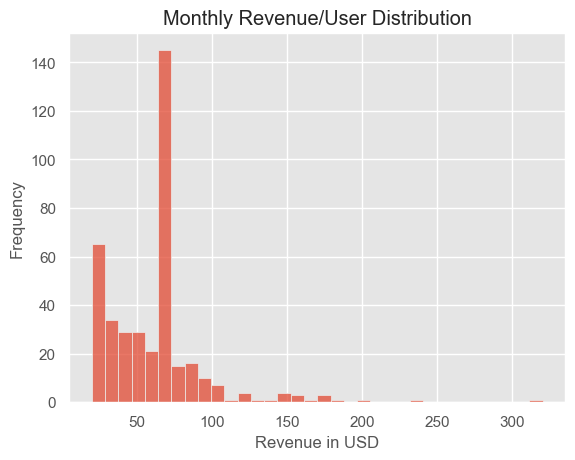

Median monthly revenue/user:  70.0 
Average monthly revenue/user:  64.19569730941704


In [52]:
# Plotting monthly revenue distribution 
sns.histplot(combined_df.groupby("user_id")["monthly_revenue"].mean())
plt.title("Monthly Revenue/User Distribution")
plt.xlabel("Revenue in USD")
plt.ylabel("Frequency")
plt.show()

# Printing median and mean monthly reveenue
print('Median monthly revenue/user: ',combined_df["monthly_revenue"].median(),
      "\nAverage monthly revenue/user: ",combined_df["monthly_revenue"].mean())

After creating columns for overages for minutes, messages, and gb we were able to generate the column for monthly revenue per month per customer

The figure above shows disribution of revenue over the 12 month sample. We can see most month's revenue are below 70.00 USD. There a huge candle at the 70 mark indicating it being the mode of all values with a few outliers. We'll remove those outliers next, before moving onto our analysis

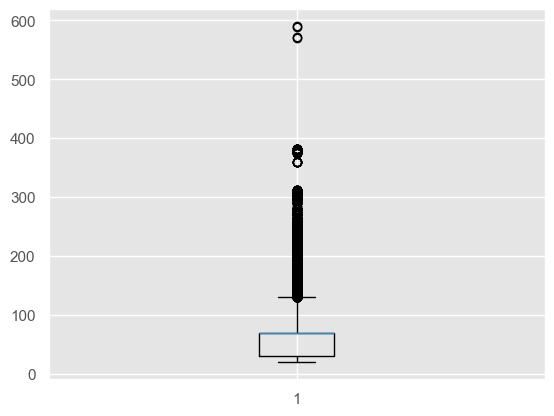

Number of outliers:  4964 

Outlier `plan` distribution:  plan
surf        4625
ultimate     339
Name: count, dtype: int64


In [53]:
# Creating boxplot and saving to variable to extract outliers
boxplot = plt.boxplot(combined_df["monthly_revenue"].values)
plt.show()

# Saving array of all outlier values to `outliers` variable for filtering
outliers = boxplot["fliers"][0].get_data()[1]

# Filtering for outliers in dataframe for future analysis
outliers_df = combined_df[combined_df["monthly_revenue"].isin(outliers)]


print("Number of outliers: ", len(outliers),"\n\nOutlier `plan` distribution: ", outliers_df["plan"].value_counts())

In [54]:
# Filtering out outliers to produce a clean df for analysis
clean_df = combined_df.drop(outliers_df.index)

# Viewing dataframe shape to confirm dropped rows 
clean_df.shape

(79776, 31)

The boxplot produced showed a large amount of anomalies showing 4,964 outliers within the sample, 4625 of which were `surf` plan users. We've removed thoem and saved the result to a new variable as our clean dataset ready for analysis.

---
## Data Analysis
---

We'll now calculate some useful descriptive statistics for the aggregated and merged data, which typically reveal an overall picture captured by the data. Here we'll draw useful plots to help the understanding. 

Since our task is to compare the profitability of the two plans, we'll dig into finding the most profitable one. We'll also compare the two regions associated with the hypothesis to be tested, NY/NJ region and the others.

### Calls

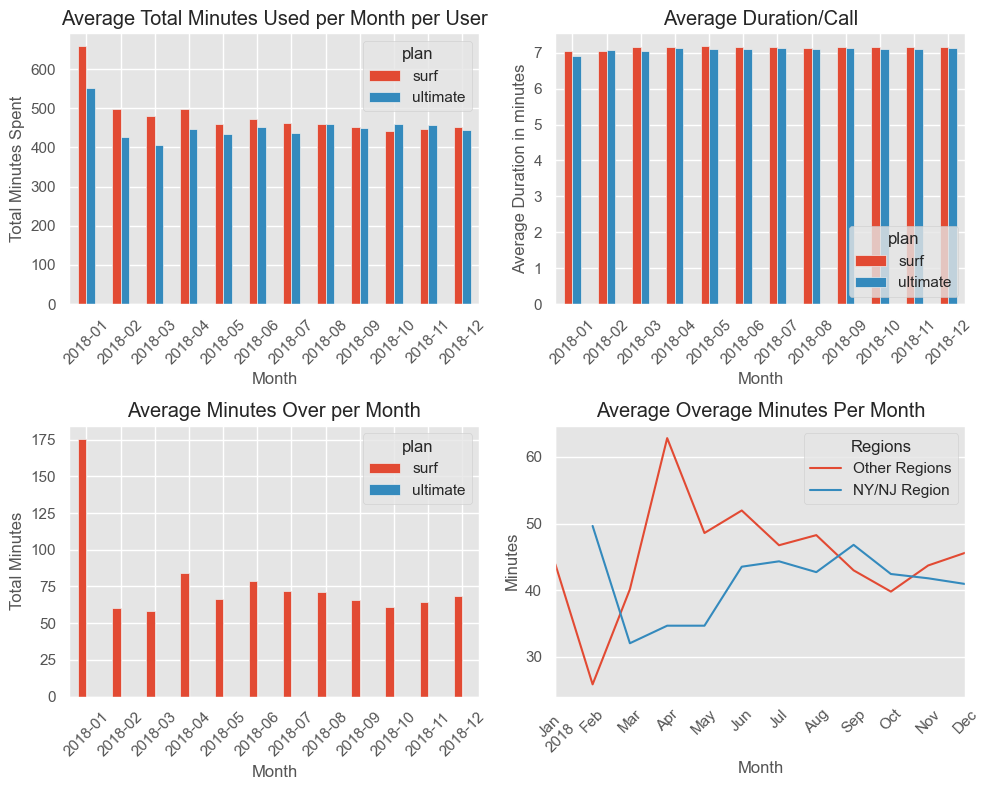

In [55]:
# Configuring subplots
fig, axs = plt.subplots(2,2, figsize=(10,8))

# Plotting Total Minutes spent per month
ax = axs[0][0]
clean_df.groupby(["plan","month"])["total_minutes"].mean().unstack(level=0).plot(
    kind = "bar",
    stacked = False,
    title = "Average Total Minutes Used per Month per User",
    xlabel = "Month",
    ylabel = "Total Minutes Spent",
    rot = 45,
    ax = ax
    )

# Plotting average minutes per call
ax = axs[0][1]
clean_df.groupby(["plan","month"])["average_duration"].mean().unstack(level=0).plot(
    kind = "bar",
    stacked = False,
    title = "Average Duration/Call",
    xlabel = "Month",
    ylabel = "Average Duration in minutes",
    rot = 45,
    ax = ax 
    )
ax.legend(title="plan",loc="lower right")

# Plotting total of minutes over per month per plan
ax = axs[1][0]
clean_df.groupby(["plan","month"])["minutes_over"].mean().unstack(level=0).plot(
    kind = "bar",
    stacked = False,
    title="Average Minutes Over per Month",
    xlabel = "Month",
    ylabel = "Total Minutes",
    rot = 45,
    ax = ax
    )

# Plotting average monthly revenue per user per month
ax = axs[1][1]

line_1 = clean_df.query("city not in @ny_region").groupby("month")["minutes_over"].mean().plot(
    title = "Average Overage Minutes Per Month",
    label = "Other Regions",
    xlabel = "Month",
    ylabel = "Minutes",
    ax = ax,
    rot = 45,
)
line_2 = clean_df.query("city in @ny_region").groupby("month")["minutes_over"].mean().plot(
    title = "Average Overage Minutes Per Month",
    label = "NY/NJ Region",
    xlabel = "Month",
    ylabel = "Minutes",
    rot = 45,
    ax = ax
)
ax.legend(title="Regions")
plt.tight_layout()
plt.show()


Top left figure shows us `surf` users spend more minutes than `ultimate` users each month minus October and November. January has most minutes used for both plans. Likely wishing everyone a happy new year and reaching out to past and current customers/clients.

Although `surf` users outspend `ultimate` users in minutes, the top right plot visualizes the average duration of calls were about the same for both users throughout the year.

The bottom right barplot reveals the `ultimate` users did not incur any overages in minutes all year. The `surf` users on the other hand average overages in each month of the year, January in particular, users incurred the most overages in minutes with an average of about 175 minutes. This inducates the plan could warrant an increase in minutes included for a higher price, of course.

The bottom right line plot compares the amount of overages in minutes for each month between the two regions, NY/NJ and others. There is no data for the NY/NJ region users for Jan 2018. The `other` regions show a higher aver in overages for most of the year, indicating the `other` regions' usage is different thus far. 

In [56]:
# Calculating call duration mean and variance
surf_duration_avg=clean_df[clean_df["plan"]=="surf"]['average_duration'].mean()
ulti_duration_avg=clean_df[clean_df["plan"]=="ultimate"]['average_duration'].mean()
surf_duration_var=clean_df[clean_df["plan"]=="surf"]['average_duration'].var()
ulti_duration_var=clean_df[clean_df["plan"]=="ultimate"]['average_duration'].var()

# Printing calculations for assessment
print(f"Surf duration average:{surf_duration_avg}\n")
print(f"Ultimate duration average:{ulti_duration_avg}\n")
print(f"Surf duration variance:{surf_duration_var}\n")
print(f"Ultimate duration variance:{ulti_duration_var}") # Calculate the mean and the variance of the monthly call duration


Surf duration average:7.152844008388739

Ultimate duration average:7.106504404123895

Surf duration variance:0.9819539038265566

Ultimate duration variance:0.7758884005841667


The average call durations for both plan users were almost identical but the `ultimate` plan users' cal durations werew a little more consistent as its variance is about 20% lower than that of `surf` users' call duration variance.

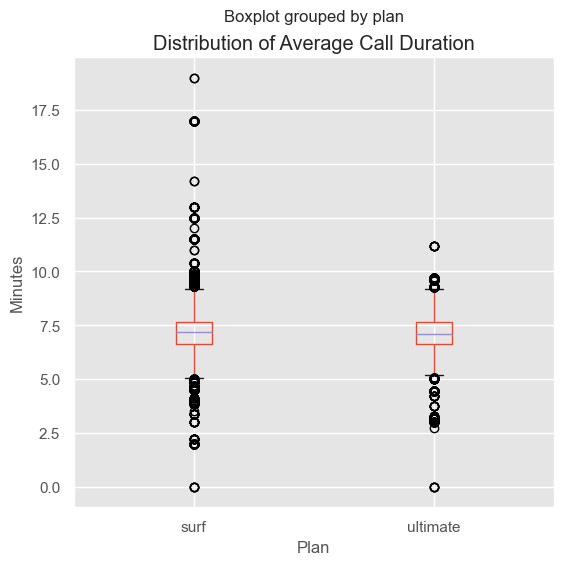

In [57]:
# Plotting boxplot to visualize distribution of call duration averages
clean_df.boxplot(
    figsize=(6,6),
    column='average_duration',
    by='plan',
)
plt.title("Distribution of Average Call Duration")
plt.xlabel("Plan")
plt.ylabel("Minutes")
plt.show()

The distributions of average call durations are very similar between both plans. The measures of locations are almost exact. If the number of `ultimate` and `surf` users were balanced in this sample, they'd likely be indistinguishable.

### Messages

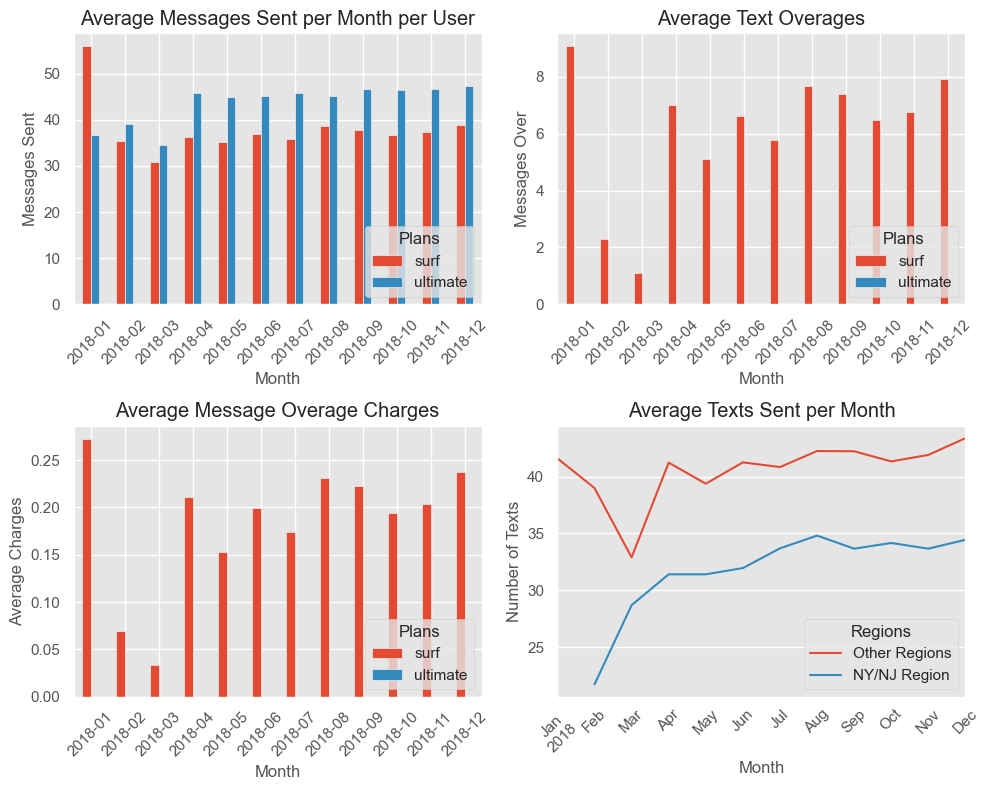

In [58]:
# Configuring subplots
fig, axs = plt.subplots(2,2, figsize=(10,8))

# Plotting average messages sent per month
ax = axs[0][0]
clean_df.groupby(["plan","month"])["total_messages"].mean().unstack(level=0).plot(
    kind = "bar",
    stacked = False,
    title = "Average Messages Sent per Month per User",
    xlabel = "Month",
    ylabel = "Messages Sent",
    rot = 45,
    ax = ax
    )

ax.legend(title="Plans", loc="lower right")

# Plotting average monthly message overages per user
ax = axs[0][1]
clean_df.groupby(["plan","month"])["messages_over"].mean().unstack(level=0).plot(
    kind = "bar",
    stacked = False,
    title = "Average Text Overages",
    xlabel = "Month",
    ylabel = "Messages Over",
    rot = 45,
    ax = ax 
)

ax.legend(title="Plans", loc="lower right")

# Plotting average monthly message overage charges per user
ax = axs[1][0]
clean_df.groupby(["plan","month"])["messages_charges"].mean().unstack(level=0).plot(
    kind = "bar",
    stacked = False,
    title="Average Message Overage Charges",
    xlabel = "Month",
    ylabel = "Average Charges",
    rot = 45,
    ax = ax
)

ax.legend(title="Plans", loc="lower right")

# Plotting average monthly messages sent per user 
ax = axs[1][1]

line_1 = clean_df.query("city not in @ny_region").groupby("month")["total_messages"].mean().plot(
    title = "Average Texts Sent per Month",
    label = "Other Regions",
    xlabel = "Month",
    ylabel = "Number of Texts",
    ax = ax,
    rot = 45
)

line_2 = clean_df.query("city in @ny_region").groupby("month")["total_messages"].mean().plot(
    title = "Average Texts Sent per Month",
    label = "NY/NJ Region",
    xlabel = "Month",
    ylabel = "Number of Texts",
    rot = 45,
    ax = ax
)

ax.legend(title="Regions")

plt.tight_layout()
plt.show()


The average messages sent per user per month is represented by our upper left figure. We can see the only month `surf` users sent more messages per user on average is on January. `ultimate` users communicate more than `surf` users via text on all other months. 

The upper right figure confirms `ulmiate` users either are more responsible with their usages thus far or have more minutes and messages than they need.

The lower left bar plot visualizes the charges incurred by `surf` customers on average per month. Not much more than a quarter on the highest month, January. 

We have a plot comparing text overages between the 2 regions, NY/NJ and others. The others region shows send more texts per month on aversage than the NY/NJ region, which continues to affirm the usage between the two regions behaviors are a bit different. They all still average less texts per month than the number of texts included per month, indicating no real difference in revenue.

### Internet

In [59]:
clean_df.columns

Index(['user_id', 'first_name', 'last_name', 'age', 'city', 'reg_date', 'plan',
       'churn_date', 'reg_month', 'total_minutes', 'total_calls',
       'average_duration', 'total_messages', 'month', 'total_gb', 'average_mb',
       'total_sessions', 'messages_included', 'gb_included',
       'minutes_included', 'usd_monthly_pay', 'usd_per_gb', 'usd_per_messages',
       'usd_per_minutes', 'minutes_over', 'minutes_charges', 'messages_over',
       'messages_charges', 'gb_over', 'gb_charges', 'monthly_revenue'],
      dtype='object')

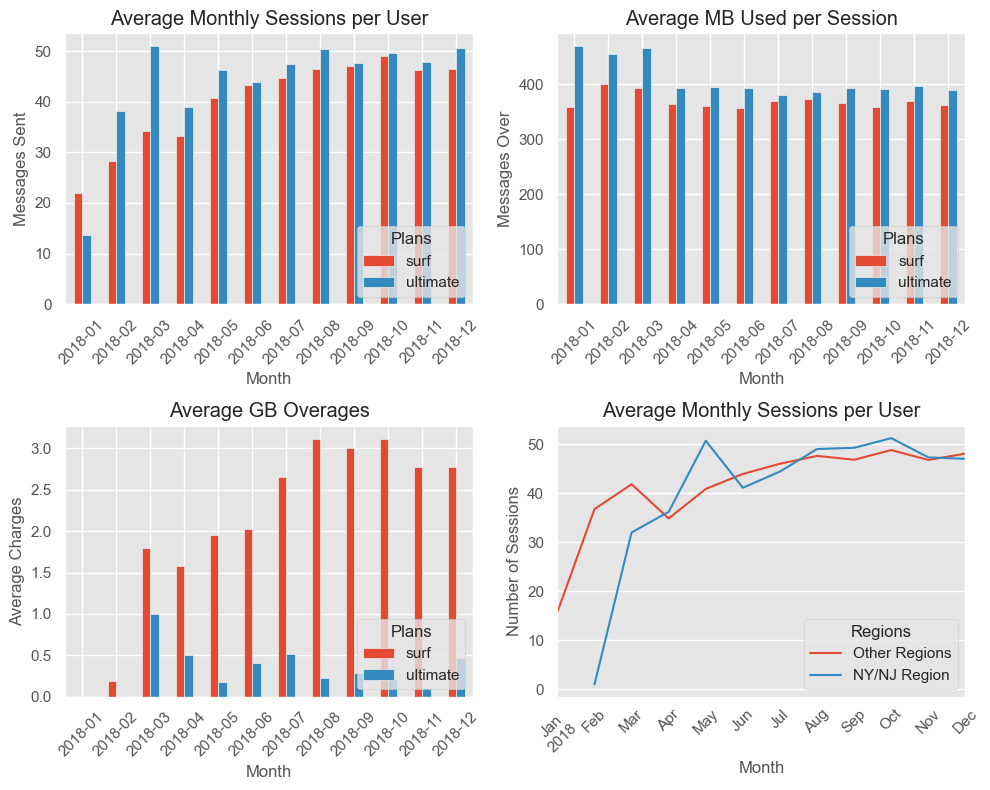

In [60]:
# Configuring subplots
fig, axs = plt.subplots(2,2, figsize=(10,8))

# Plotting average monthly sessions per user
ax = axs[0][0]
clean_df.groupby(["plan","month"])["total_sessions"].mean().unstack(level=0).plot(
    kind = "bar",
    stacked = False,
    title = "Average Monthly Sessions per User",
    xlabel = "Month",
    ylabel = "Messages Sent",
    rot = 45,
    ax = ax
    )

ax.legend(title="Plans", loc="lower right")

# Plotting monthly average mb used per session
ax = axs[0][1]
clean_df.groupby(["plan","month"])["average_mb"].mean().unstack(level=0).plot(
    kind = "bar",
    stacked = False,
    title = "Average MB Used per Session",
    xlabel = "Month",
    ylabel = "Messages Over",
    rot = 45,
    ax = ax 
)

ax.legend(title="Plans", loc="lower right")

# Plotting average monthly gb overages per user
ax = axs[1][0]
clean_df.groupby(["plan","month"])["gb_over"].mean().unstack(level=0).plot(
    kind = "bar",
    stacked = False,
    title="Average GB Overages",
    xlabel = "Month",
    ylabel = "Average Charges",
    rot = 45,
    ax = ax
)

ax.legend(title="Plans", loc="lower right")

# Plotting average monthly sessions per user in each region
ax = axs[1][1]

line_1 = clean_df.query("city not in @ny_region").groupby("month")["total_sessions"].mean().plot(
    title = "Average Monthly Sessions per User",
    label = "Other Regions",
    xlabel = "Month",
    ylabel = "Number of Sessions",
    ax = ax,
    rot = 45
)

line_2 = clean_df.query("city in @ny_region").groupby("month")["total_sessions"].mean().plot(
    title = "Average Monthly Sessions per User",
    label = "NY/NJ Region",
    xlabel = "Month",
    ylabel = "Number of Sessions",
    rot = 45,
    ax = ax
)

ax.legend(title="Regions")

plt.tight_layout()
plt.show()


The average monthly data usage per user is higher among the `ultimate users in every month except January, as depicted in our upper left figure, with March reaching its peak. 

`ultimate` users also have a higher average mb used per session as shown in the upper right plot. The usage per session is at its higher during the first quarter. Businesses gearing up for a profitable year.

Although `ultimate` users show more data usage, `surf` users incurred a higher average in GB overages. This could mean the GB allowances per month are pretty low compared to the demand of the average `surf` user. Another indication of an opportunity to increase gb included for a cost that means more profit overall without alienating the customer base.

On our lower right plot, we can see the data usage is not that significant in difference between the two regions.

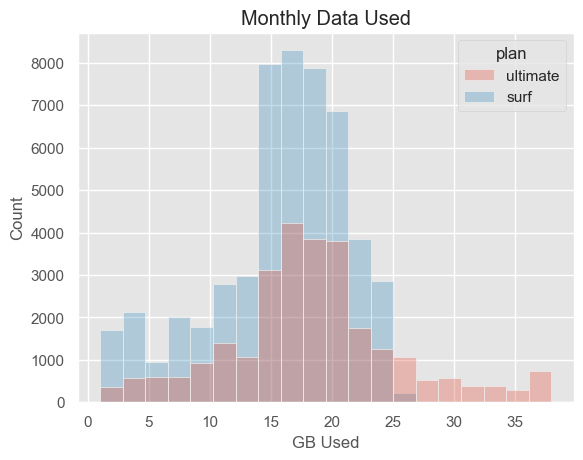

In [61]:
# Plotting distribution of monthly data used
sns.histplot(
    clean_df,
    x = "total_gb",
    bins=20,
    alpha=0.3,
    hue="plan",
)

plt.title("Monthly Data Used")
plt.xlabel("GB Used")
plt.show()

The distribution of `total_gb` for the `ultimate` users has a normal distribution whereas the `surf` user shows a skewed distribution. 

In [62]:
# Calculating mean and variance to see data predictability
surf_gb_avg=clean_df[clean_df["plan"] == "surf"]['total_gb'].mean()
ulti_gb_avg=clean_df[clean_df["plan"] == "ultimate"]['total_gb'].mean()
surf_gb_var=clean_df[clean_df["plan"] == "surf"]['total_gb'].var()
ulti_gb_var=clean_df[clean_df["plan"] == "ultimate"]['total_gb'].var()

print(f"Surf average: {surf_gb_avg}\n")
print(f"Ultimate average: {ulti_gb_avg}\n")
print(f"Surf data variance: {surf_gb_var}\n")
print(f"Ultimate data variance: {ulti_gb_var}")

Surf average: 15.693175732537679

Ultimate average: 18.396224356176344

Surf data variance: 32.207599508479255

Ultimate data variance: 51.44014143131124


After calculating the mean and variances for each plan's usage, we can see the average data used per month is higher among the `ultimate` users by about 3GB. The variance show the `surf` data usage is high showing a lot of volatility in the data usage between fellow `surf` users but is 20% lower than the variance of `ultimate` users. The data usage for `ultimate` users show the monthly values have large swings between users in the same plan.

## Revenue

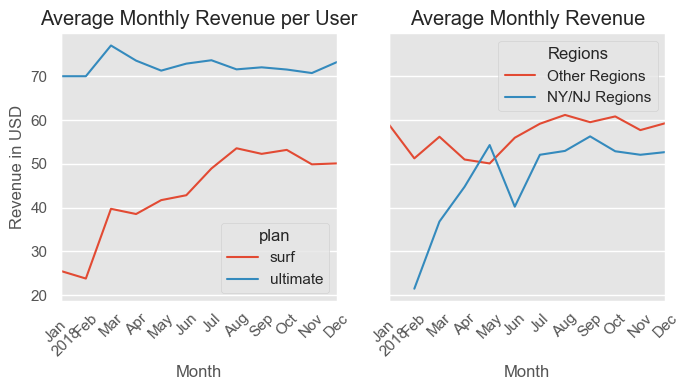

In [63]:
fig, axs = plt.subplots(1,2,figsize=(7,4), sharey=True)

# Plotting average monthly revenue per user per month
ax = axs[0]
clean_df.groupby(["plan","month"])["monthly_revenue"].mean().unstack(level=0).plot(
    title = "Average Monthly Revenue per User",
    stacked = False,
    xlabel = "Month",
    ylabel = "Revenue in USD",
    rot = 45,
    ax = ax
)

# Plotting average monthly revenue by region
ax = axs[1]
clean_df.query("city not in @ny_region").groupby("month")["monthly_revenue"].mean().plot(
    title = "Average Monthly Revenue",
    label = "Other Regions",
    xlabel = "Month",
    rot = 45,
    ax = ax
)
clean_df.query("city in @ny_region").groupby("month")["monthly_revenue"].mean().plot(
    title = "Average Monthly Revenue",
    label = "NY/NJ Regions",
    xlabel = "Month",
    rot = 45,
    ax = ax
)

plt.legend(title="Regions")

plt.tight_layout()
plt.show()

Looking at the revenue data, we can't go with the totals as those values would be tremendously bias. The number of `surf` users outnumber the `ultimate` users by almost 2x. 

We plotted the average monthly revenues (left figure) by plan and can see `ultimate` users average a much higher revenue than `surf` users by at least 40% every month. 

The figure on the right shows average monthly revenue by region. Other regions average higher revenue in every month except for April.

In [64]:
# Calculating average and variance of monthly revenues 
surf_rev = clean_df[clean_df["plan"] == "surf"]['monthly_revenue']
ulti_rev = clean_df[clean_df["plan"] == "ultimate"]['monthly_revenue']

In [65]:
# Printing value measures of location and dispersion
print(f"Surf average revenue:{surf_rev.mean()}\n")
print(f"Ultimate average revenue: {ulti_rev.mean()}\n")
print(f"Surf median revenue: {surf_rev.median()}\n")
print(f"Ultimate median revenue: {ulti_rev.median()}\n")
print(f"Surf revenue sigma: {surf_rev.std()}\n")
print(f"Ultimate revenue sigma: {ulti_rev.std()}\n")
print(f"Surf revenue variance: {surf_rev.var()}\n")
print(f"Ultimate revenue variance: {ulti_rev.var()}")

Surf average revenue:48.250861066483054

Ultimate average revenue: 72.27018769096465

Surf median revenue: 40.0

Ultimate median revenue: 70.0

Surf revenue sigma: 30.3053649854448

Ultimate revenue sigma: 9.798551192130676

Surf revenue variance: 918.4151469010237

Ultimate revenue variance: 96.01160546480548


The dispersion of the `monthly_revenue` values is a bit concerning when looking at `surf` user revenue. The variance of their re==monthyl revenue is quite high, especially compared to that of the `ultimate` users.

The average monthly revenue of `ultimate` users is not only 75% higher than `surf` users, but it's also much more predictable as $70 is the cost basis of the plan. The plan cost for `surf` plan is $20 but the average is double, $40. Could be an opportunity to raise the monthly `user` plan price.

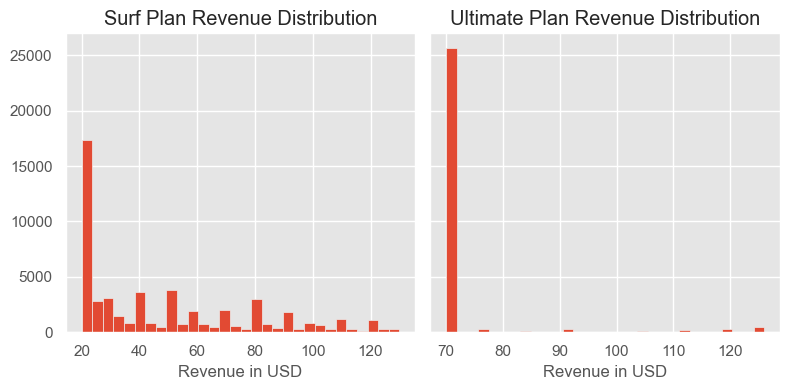

In [66]:
# Plotting revenue distributions
fig, axs = plt.subplots(1, 2, figsize=(8,4),sharey=True)

# We can set the number of bins with the *bins* keyword argument.
axs[0].hist(surf_rev, bins=30)
axs[1].hist(ulti_rev, bins=30)

axs[0].set_title('Surf Plan Revenue Distribution')
axs[0].set_xlabel("Revenue in USD")

axs[1].set_title('Ultimate Plan Revenue Distribution')
axs[1].set_xlabel("Revenue in USD")

axs[0].set_ylabel='Frequency'

plt.tight_layout()
plt.show()

We can see the distribution of revenue between both plans are not normal distributions. They are heavily skewed towards the plan base cost. There are not many `ultimate` users paying more than the $70 basis cost for the plan whereas there are quite a few `surf` users paying for overages. 

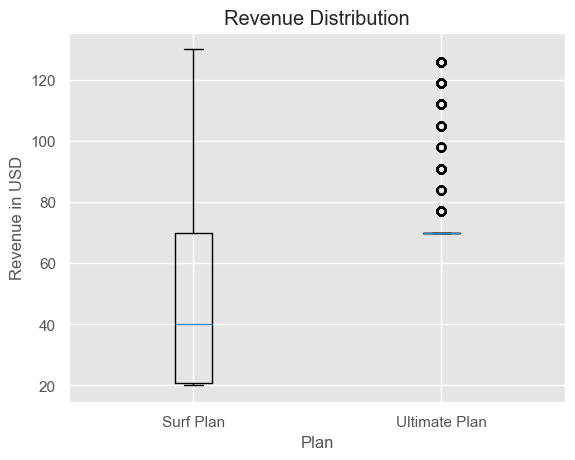

In [67]:
# Multiple box plots on one Axes
plt.figure()
plt.boxplot([surf_rev,ulti_rev])

plt.title("Revenue Distribution")
plt.xlabel("Plan")
plt.xticks(ticks=[1,2],labels=["Surf Plan", "Ultimate Plan"])
plt.ylabel("Revenue in USD")
plt.show()


As we can see with the boxplot above, the average `monthly_revenue` for `ultimate` users is at the 75th percentile of `users` `monthly_revenue`. It's looking like there is a significant difference in revenue between `surf` and `ultimate` plans.

We'll confirm or reject this intuition with our upcoming hypothesis test.

## Test statistical hypotheses

Here we will be testing the following hypotheses:
<li>
    There is no difference in revenue between the two plans, <em>Surf</em> and <em>Ultimate</em>.
</li>
<li>
    The average revenue from users in NY-NJ area is same from that of the users from other regions.
</li>


H0:There is no difference in revenue between the two plans, Surf and Ultimate<br>
H1:There is a difference in revenue between the two plans, Surf and Ultimate

In [68]:
# Testing first  hypothesis
alpha=0.05
plan_result=st.ttest_ind(surf_rev,ulti_rev)
print('p-value:',plan_result.pvalue)
if (plan_result.pvalue) < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 0.0
We reject the null hypothesis


We've found there is a difference in revenue between `surf` and `ultimate` as the result from inputting both plans' revenues through the ttest got us a p-value lower than our alpha.

H0:The average revenue from users in NY-NJ area is same from that of the users from other regions<br>
H1:The average revenue from users in NY-NJ area is not the same from that of the users from other regions

In [69]:
ny_nj_data = clean_df.query('city in @ny_region')
outside_data = clean_df.query('city not in @ny_region')

In [70]:
# Declaring subsets of the data for hypothesis testing
ny_nj_rev=ny_nj_data['monthly_revenue']
outside_rev=outside_data['monthly_revenue']

# Testing hypothesis number 2
alpha=0.05
region_result=st.ttest_ind(ny_nj_rev,outside_rev)
print('p_value:',region_result.pvalue)
if (region_result.pvalue) < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p_value: 4.418477679952914e-164
We reject the null hypothesis


After running the revenues from both NY/NJ & all other regions through our ttest, we received a p-value mcuh higher than the alpha set. The result tells us there is no difference between the 2 regions' revenue and cannot reject the null hyporthesis.

---
# Conclusion
---

In [71]:
print(f'In conclusion, although the ultimate users account for roughly 50% of the client base\nthey generate ${(ulti_rev.mean()-surf_rev.mean()):.4} higher average revenue per client than the surf_users. I would\nfeel confident in saying that reallocating marketing budget towards acquiring more\nultimate users would be a good decision. Ultimate user revenue standard deviation of\n{ulti_rev.std():.4}, is much lower than that of the surf users at {surf_rev.std():.4} making new potential ultimate\nuser revenue more predictable and higher than a new surf user.')

In conclusion, although the ultimate users account for roughly 50% of the client base
they generate $24.02 higher average revenue per client than the surf_users. I would
feel confident in saying that reallocating marketing budget towards acquiring more
ultimate users would be a good decision. Ultimate user revenue standard deviation of
9.799, is much lower than that of the surf users at 30.31 making new potential ultimate
user revenue more predictable and higher than a new surf user.
